<a href="https://colab.research.google.com/github/Illakiyaa/DS_PROJECT_IN_PYTHON/blob/main/ONIC%20KIDNEY%20DISEASE%20PREDICTION%20USING%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NAME : ILLAKIYA.A
## RED.NO : 210620106025
## NAAN MUDALVAN ID : AU210620106025
## COLLEGE NAME : JEPPIAAR INSTITUTE OF TECHNOLOGY

## **CHRONIC KIDNEY DISEASE PREDICTION USING ML**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
df=pd.read_csv("/content/kidney_disease (1).csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.drop('id', axis = 1, inplace = True)

In [6]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "blood_pressure":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "specific_gravity":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "albumin":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "sugar":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "red_blood_cells":
 [nan 'normal' 'abnormal']
unique values in "pus_cell":
 ['normal' 'abnormal' nan]
unique values in "pus_cell_clumps":
 ['notpresent' 'present' nan]
unique values in "bacteria":
 ['notpresent' 'present' nan]
unique values in "blood_glucose_random":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114

## **Preprocessing**

In [11]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [12]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [13]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [14]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

## **Fixing Missing Values**

In [16]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [17]:
df[num_cols].isnull().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [18]:
df[cat_cols].isnull().sum().sort_values(ascending = False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [19]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [20]:
for col in num_cols:
    random_value_imputation(col)

df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [21]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

## **Feature Encoding**

In [22]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,220.0,...,38.0,6000.0,3.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,0
6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,100.0,...,36.0,19100.0,3.4,0,0,0,0,0,0,0
7,24.0,70.0,1.015,2.0,4.0,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,0,1,0,0
8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,0,0,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,1,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

## **Visualizing the Data**

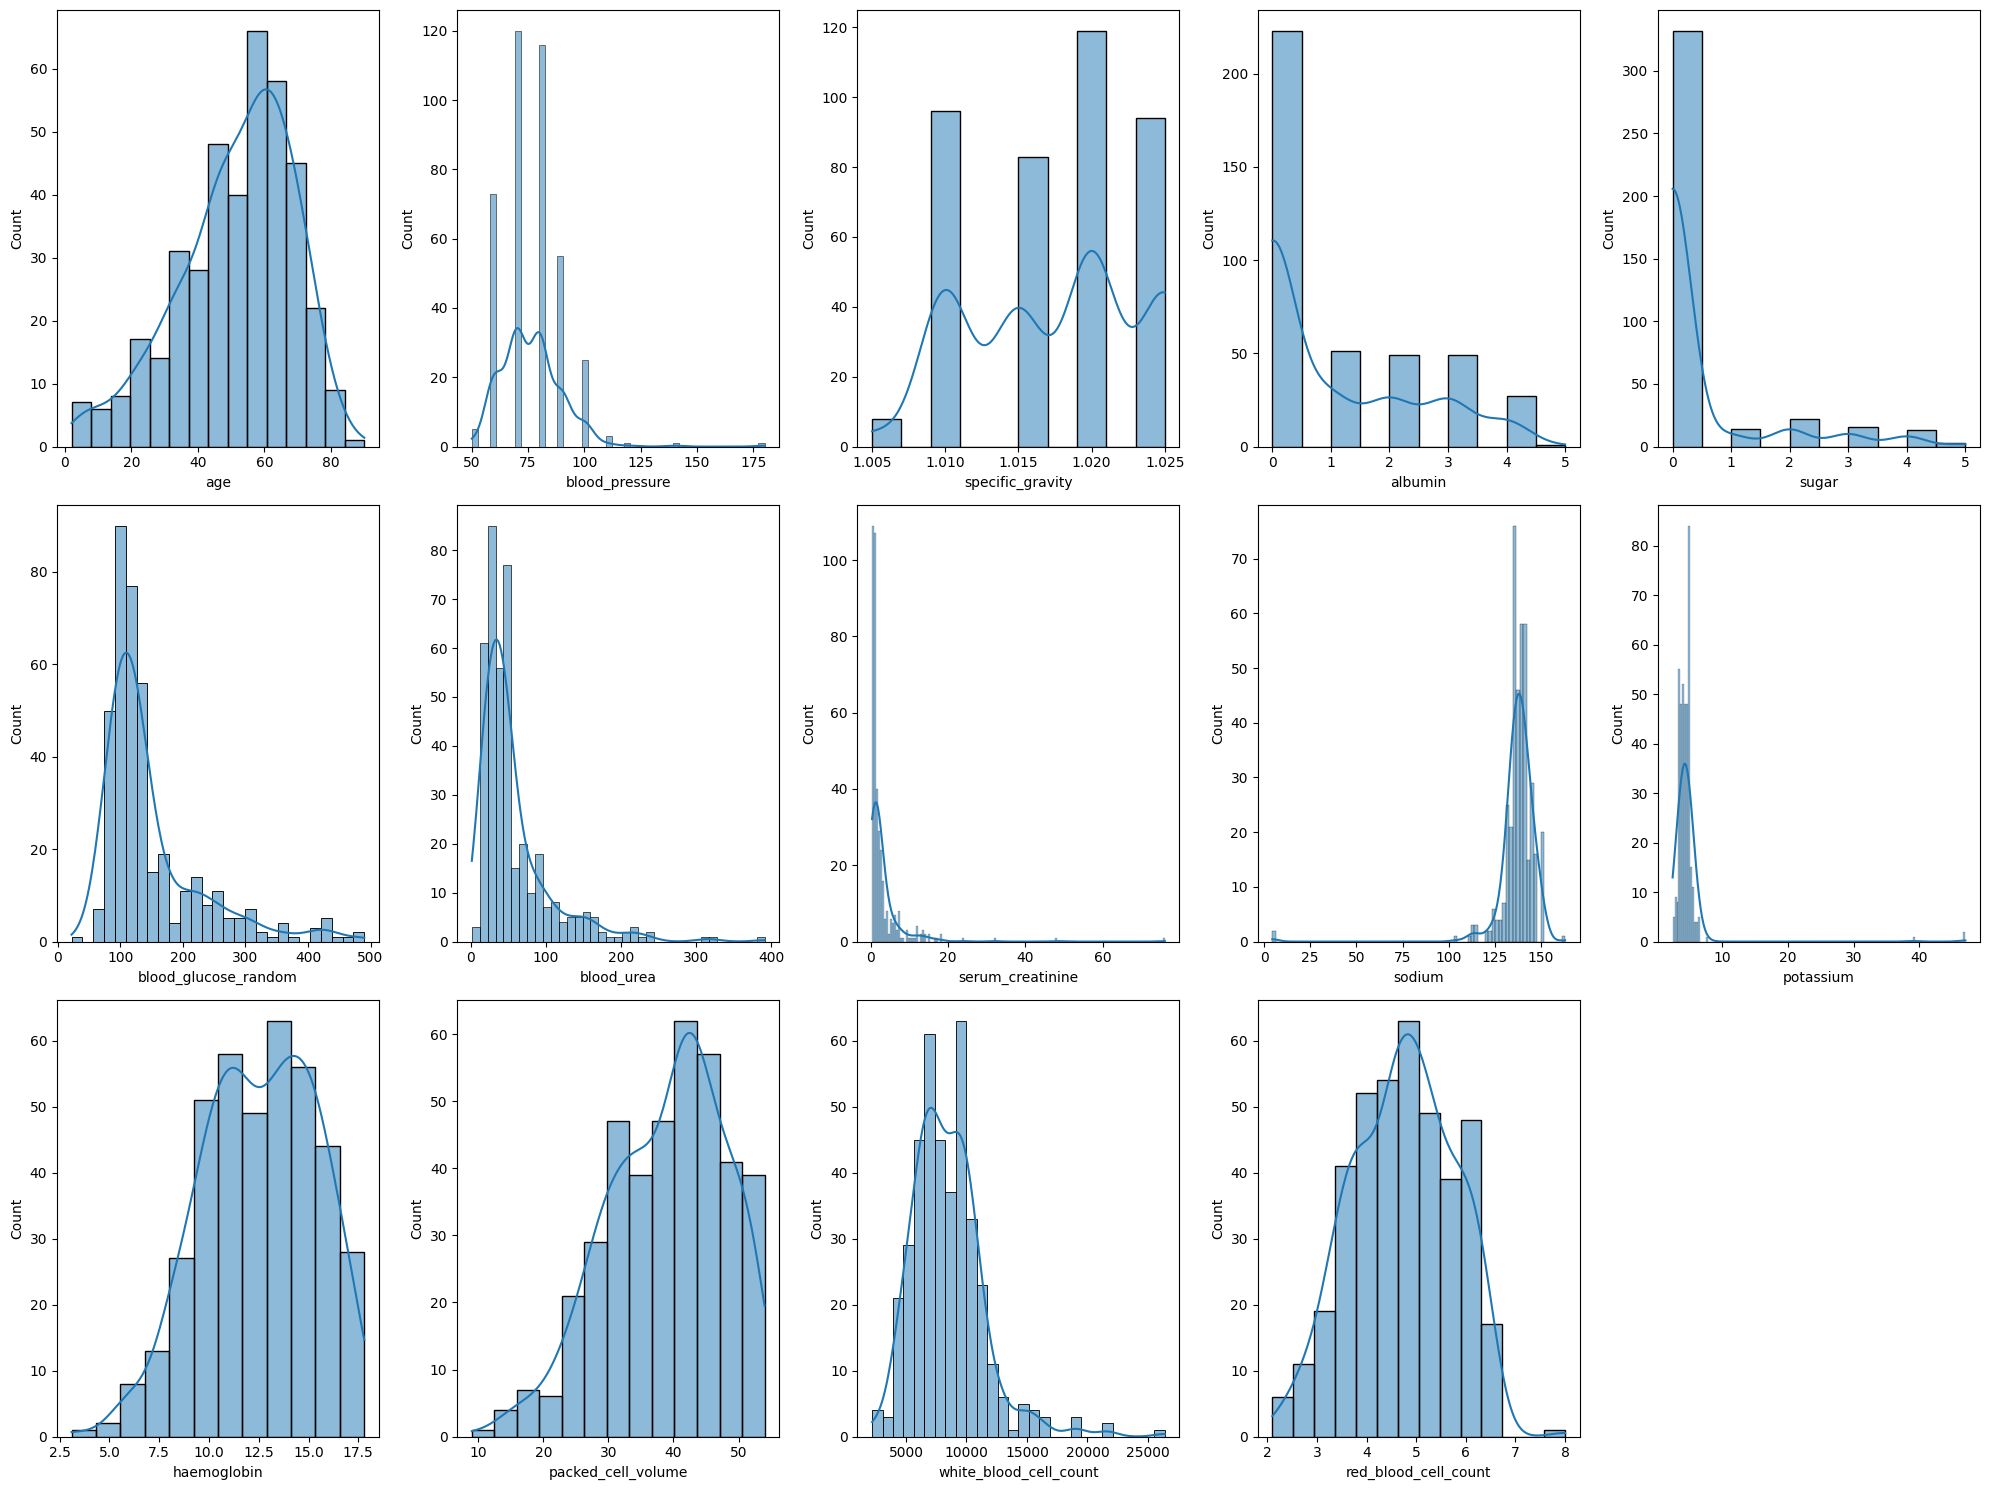

In [27]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

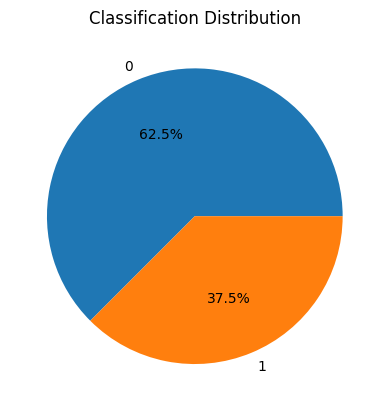

In [29]:
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Classification Distribution')
plt.show()

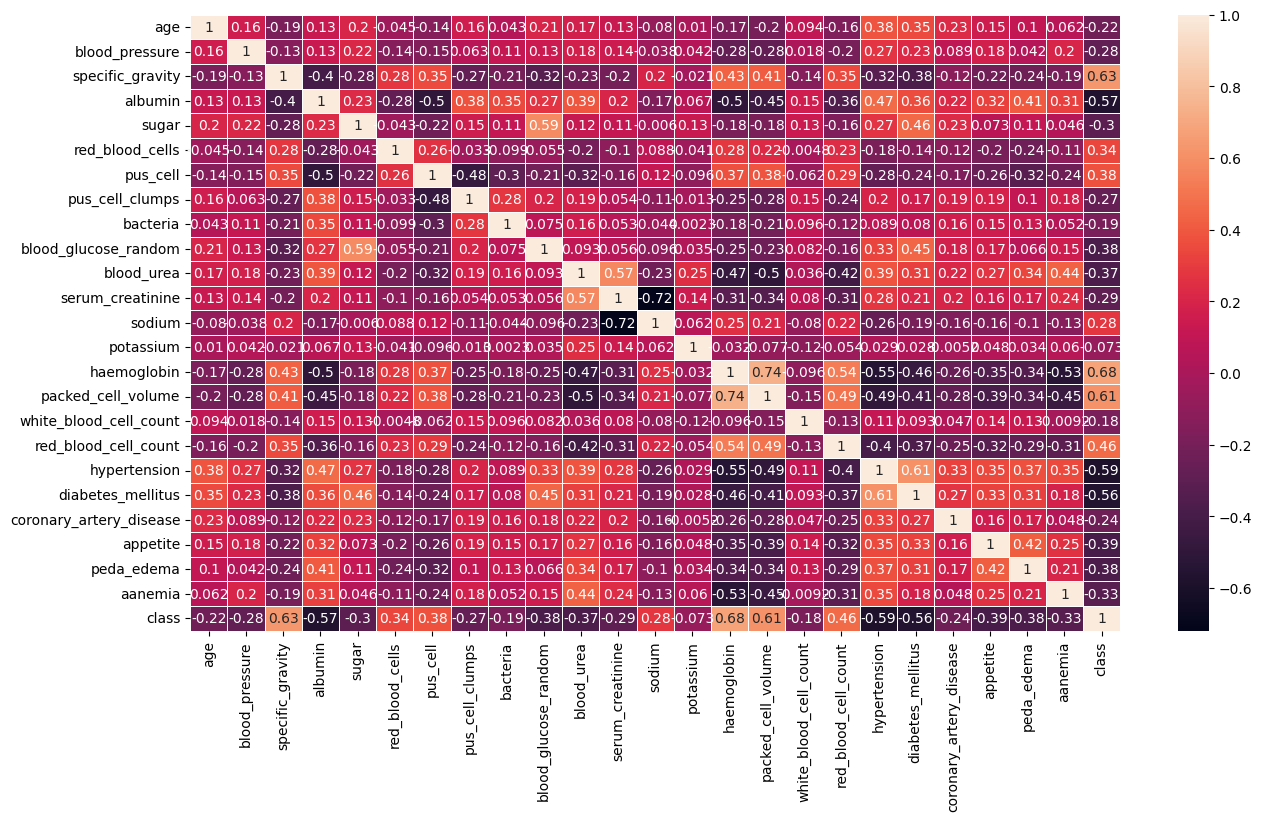

In [30]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5)
plt.show()

In [31]:
target_corr = df.corr()['class'].abs().sort_values(ascending=False)[1:]
print(target_corr)

haemoglobin                0.682300
specific_gravity           0.633224
packed_cell_volume         0.610901
hypertension               0.590438
albumin                    0.568419
diabetes_mellitus          0.559060
red_blood_cell_count       0.464698
appetite                   0.393341
blood_glucose_random       0.382400
pus_cell                   0.380238
peda_edema                 0.375154
blood_urea                 0.371896
red_blood_cells            0.335659
aanemia                    0.325396
sugar                      0.304705
serum_creatinine           0.293262
blood_pressure             0.284855
sodium                     0.276758
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.216141
bacteria                   0.186871
white_blood_cell_count     0.184478
potassium                  0.072506
Name: class, dtype: float64


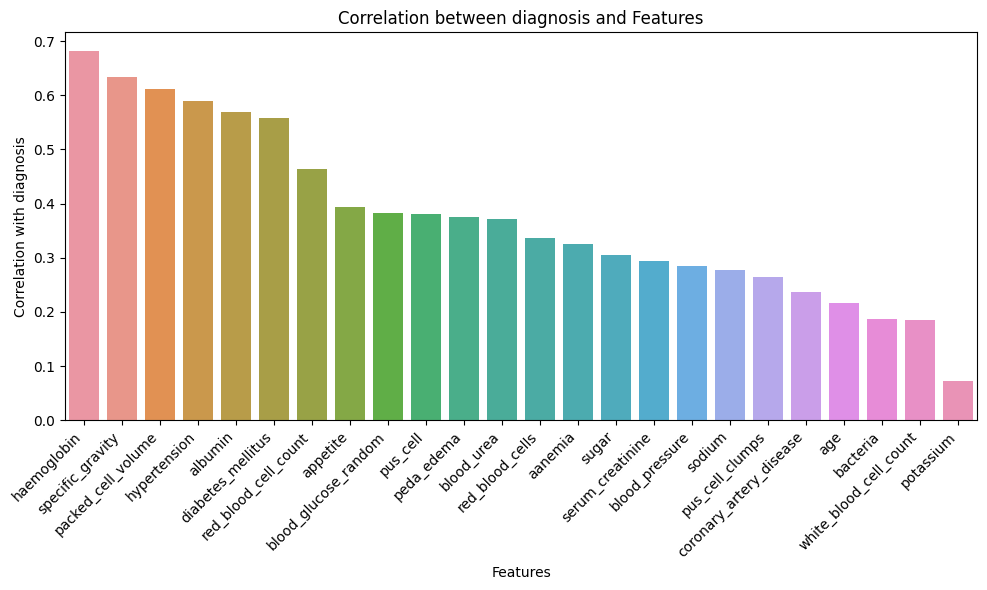

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with diagnosis')
plt.title('Correlation between diagnosis and Features')
plt.tight_layout()
plt.show()

## **Modeling**
### **Supervised Learning**

In [34]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Defining Scoring Function
def print_score(clf, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True, zero_division=0))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()


    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True, zero_division=0))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        return accuracy_score(y_test, pred) * 100, roc_auc_score(y_test, y_test_prob) * 100


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop("class", axis=1)
y = df["class"]

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=1)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

'X' shape: (400, 24)
'y' shape: (400,)


## **Logistic Regression**

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'C': 0.010387919409370415, 'penalty': 'l2', 'solver': 'newton-cg'}
Train Result:
Accuracy Score: 97.81%
_______________________________________________
ROC AUC Score: 99.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.990000    0.958333  0.978125    0.974167      0.978422
recall       0.975369    0.982906  0.978125    0.979138      0.978125
f1-score     0.982630    0.970464  0.978125    0.976547      0.978182
support    203.000000  117.000000  0.978125  320.000000    320.000000
_______________________________________________
Confusion Matrix: 
 [[198   5]
 [  2 115]]



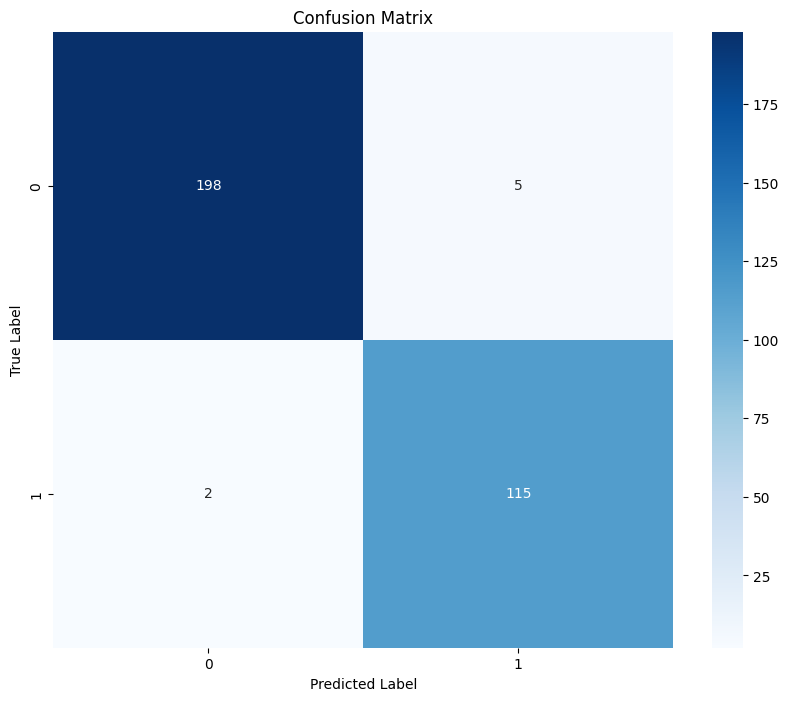

Test Result:
Accuracy Score: 91.25%
_______________________________________________
ROC AUC Score: 98.39%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.954545   0.861111    0.9125   0.907828      0.916004
recall      0.893617   0.939394    0.9125   0.916505      0.912500
f1-score    0.923077   0.898551    0.9125   0.910814      0.912960
support    47.000000  33.000000    0.9125  80.000000     80.000000
_______________________________________________
Confusion Matrix: 
 [[42  5]
 [ 2 31]]



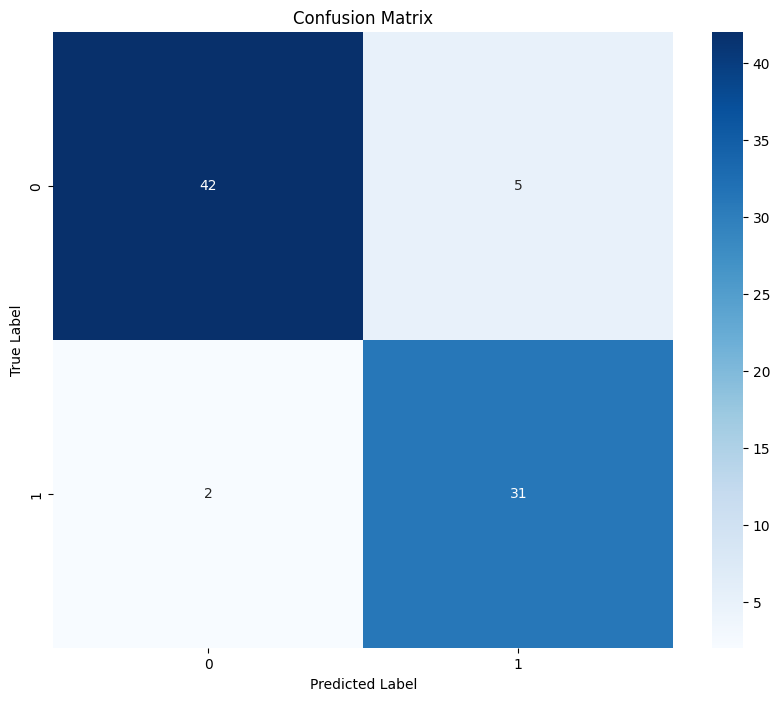

In [36]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param_grid['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
param_grid['C'] = loguniform.rvs(1e-5, 100, size=10)

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
lr_acc, lr_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

### **KNN**

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best params: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    203.0  117.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[203   0]
 [  0 117]]



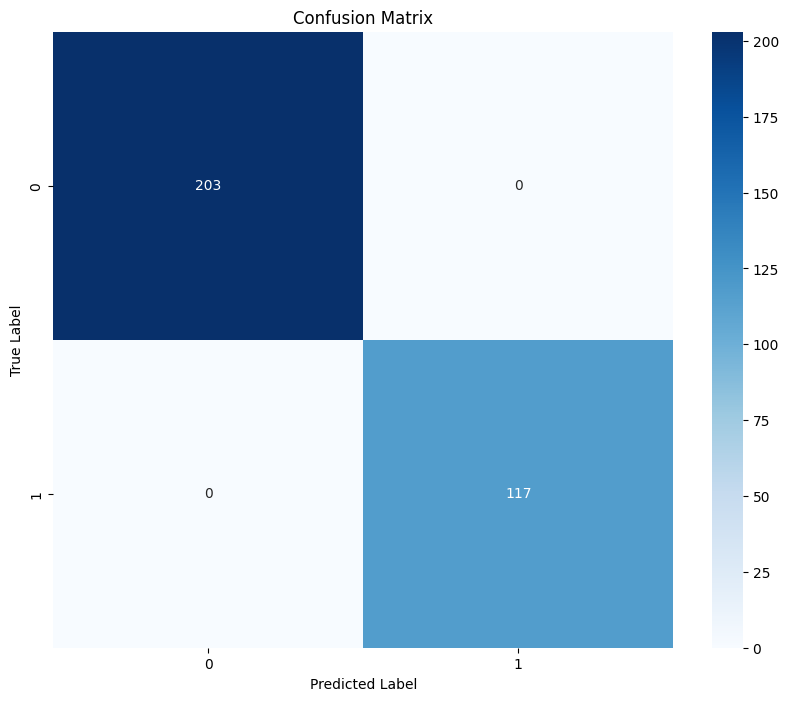

Test Result:
Accuracy Score: 88.75%
_______________________________________________
ROC AUC Score: 90.43%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.785714    0.8875   0.892857      0.911607
recall      0.808511   1.000000    0.8875   0.904255      0.887500
f1-score    0.894118   0.880000    0.8875   0.887059      0.888294
support    47.000000  33.000000    0.8875  80.000000     80.000000
_______________________________________________
Confusion Matrix: 
 [[38  9]
 [ 0 33]]



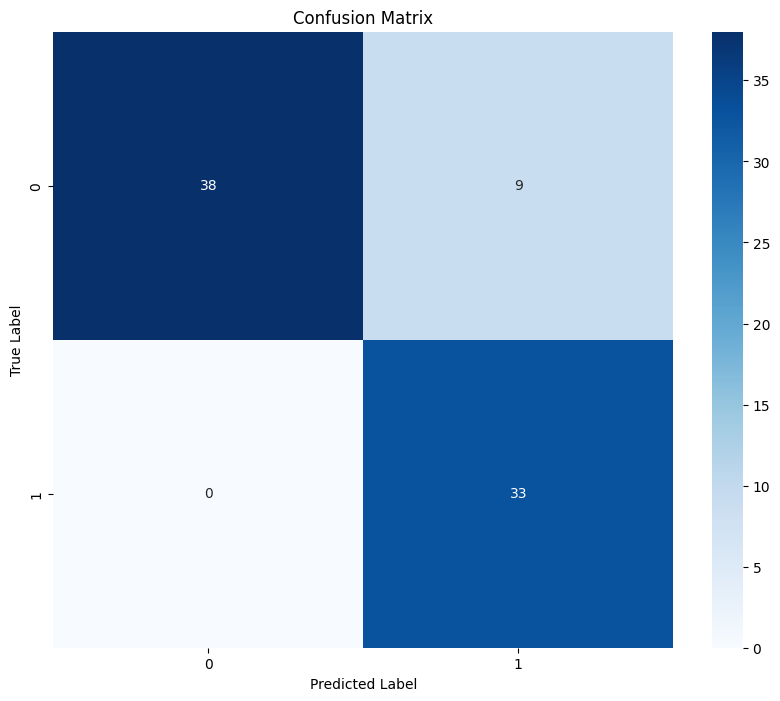

In [37]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": [i for i in range(1, 50, 10)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [i for i in range(1, 50, 10)],
             "p": [1,2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
knn_acc, knn_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

### **Decision Tree**

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
ROC AUC Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    203.0  117.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[203   0]
 [  0 117]]



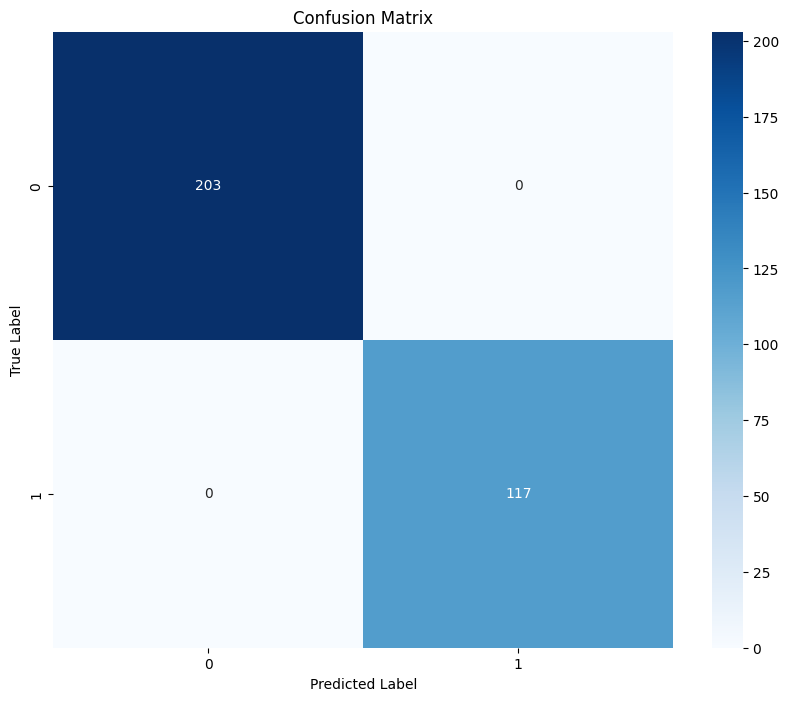

Test Result:
Accuracy Score: 96.25%
_______________________________________________
ROC AUC Score: 96.36%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.978261   0.941176    0.9625   0.959719      0.962964
recall      0.957447   0.969697    0.9625   0.963572      0.962500
f1-score    0.967742   0.955224    0.9625   0.961483      0.962578
support    47.000000  33.000000    0.9625  80.000000     80.000000
_______________________________________________
Confusion Matrix: 
 [[45  2]
 [ 1 32]]



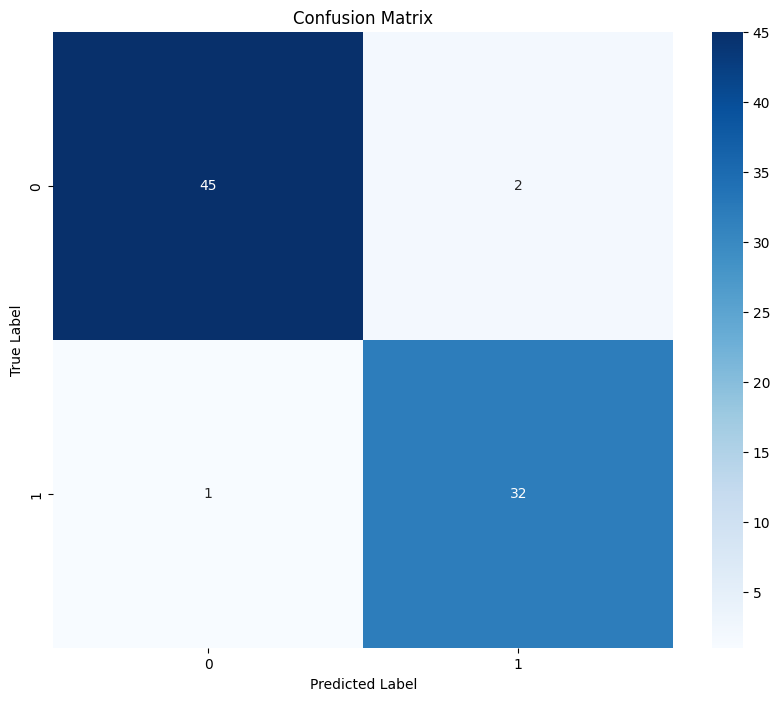

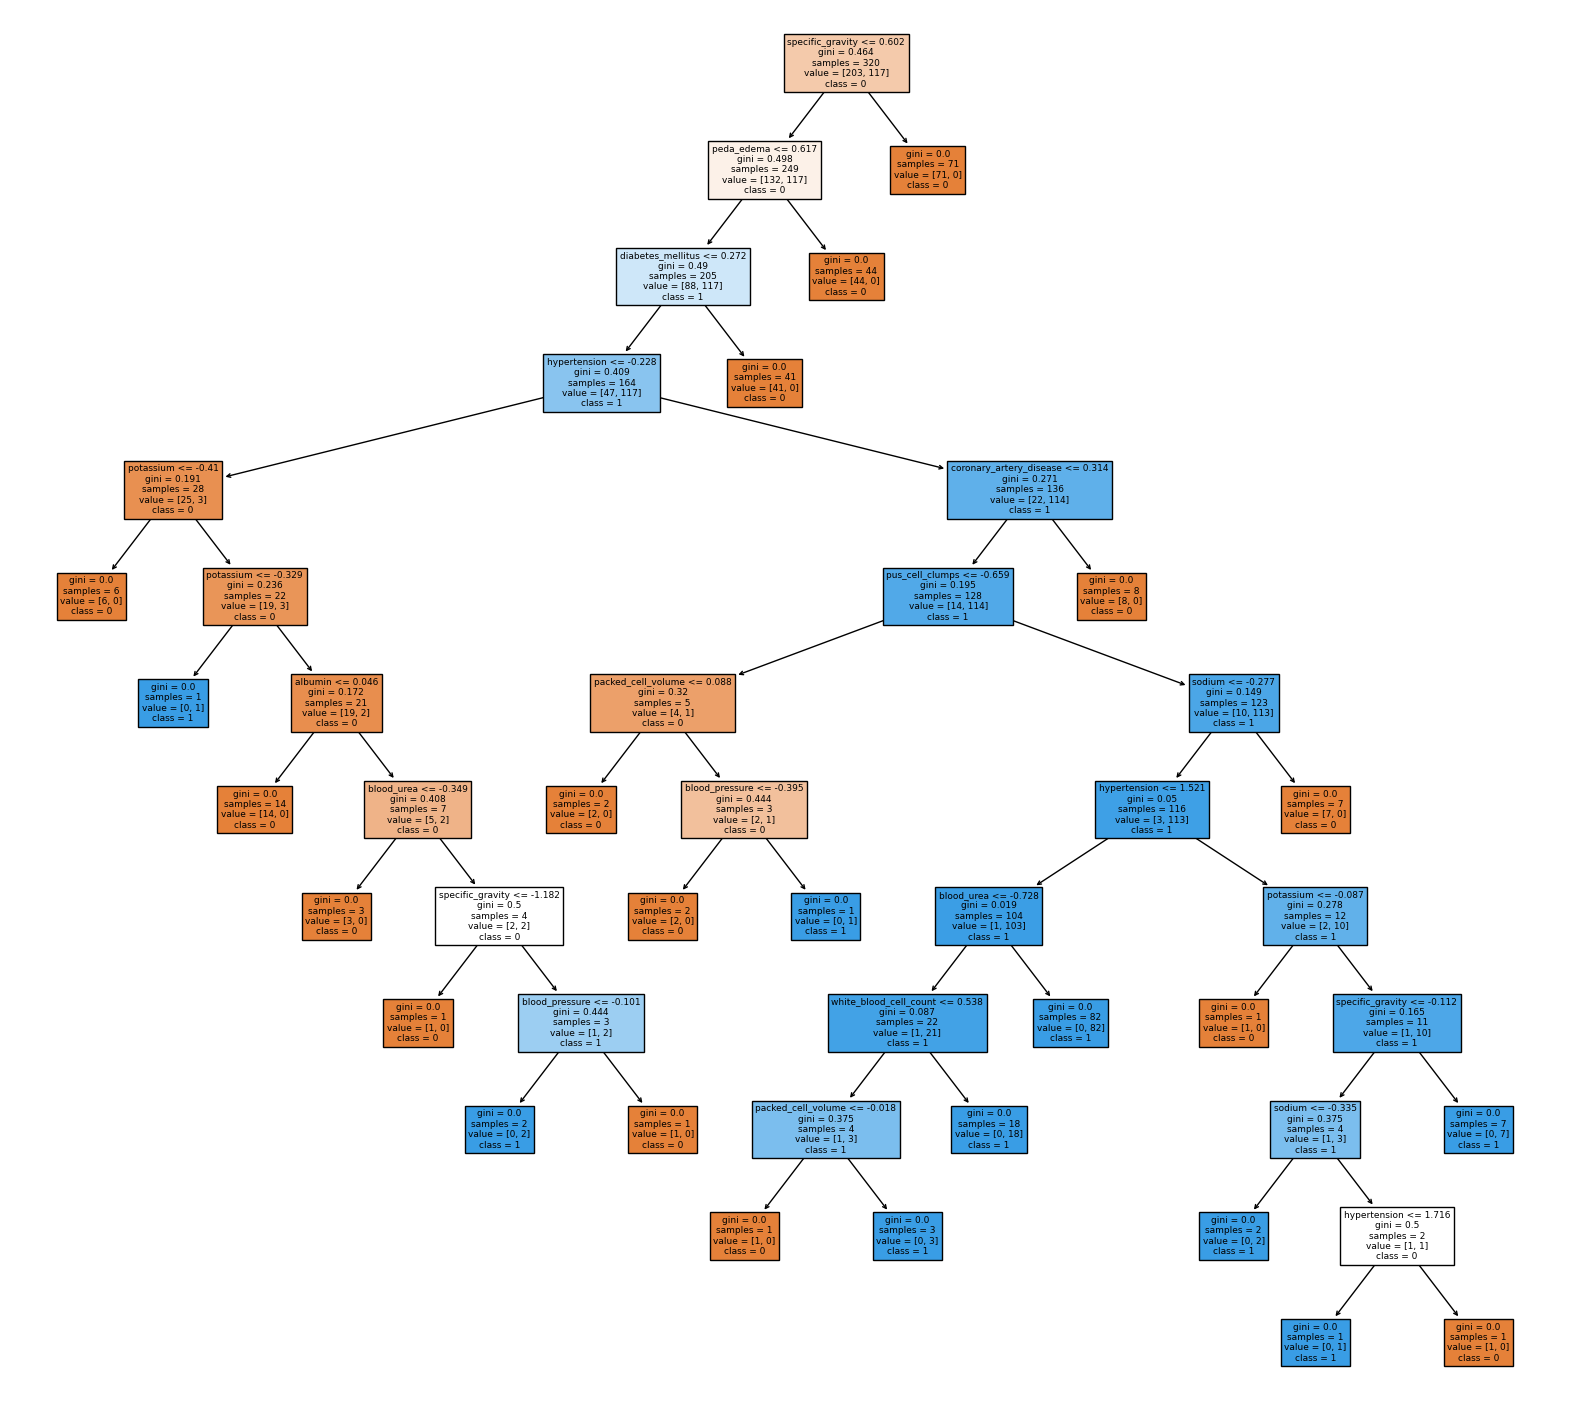

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

param_grid = {"max_depth": [3, 5, 7, 10, 15, 20, None],
              "max_features": [None, 'sqrt', 'log2'],
              "min_samples_leaf": [1, 3, 5, 10, 20],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
dtc_acc, dtc_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
plt.figure(figsize=(20, 18))
tree.plot_tree(model, feature_names = df.columns.tolist()[1:], filled=True, class_names=["0", "1"])
plt.show()

## **Random Forest**

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best params: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Train Result:
Accuracy Score: 98.75%
_______________________________________________
ROC AUC Score: 99.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.980676    1.000000    0.9875    0.990338      0.987742
recall       1.000000    0.965812    0.9875    0.982906      0.987500
f1-score     0.990244    0.982609    0.9875    0.986426      0.987452
support    203.000000  117.000000    0.9875  320.000000    320.000000
_______________________________________________
Confusion Matrix: 
 [[203   0]
 [  4 113]]



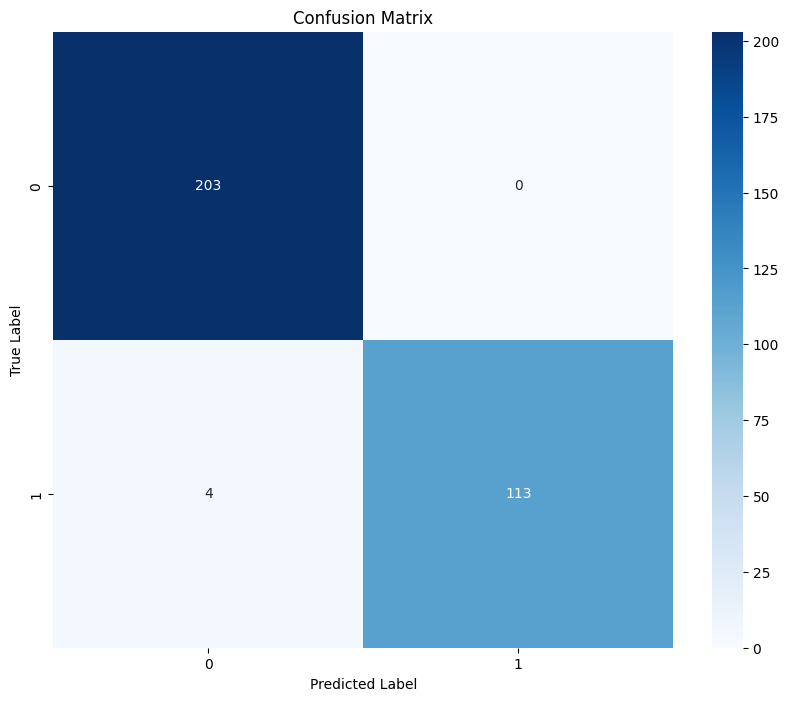

Test Result:
Accuracy Score: 97.50%
_______________________________________________
ROC AUC Score: 99.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.959184   1.000000     0.975   0.979592       0.97602
recall      1.000000   0.939394     0.975   0.969697       0.97500
f1-score    0.979167   0.968750     0.975   0.973958       0.97487
support    47.000000  33.000000     0.975  80.000000      80.00000
_______________________________________________
Confusion Matrix: 
 [[47  0]
 [ 2 31]]



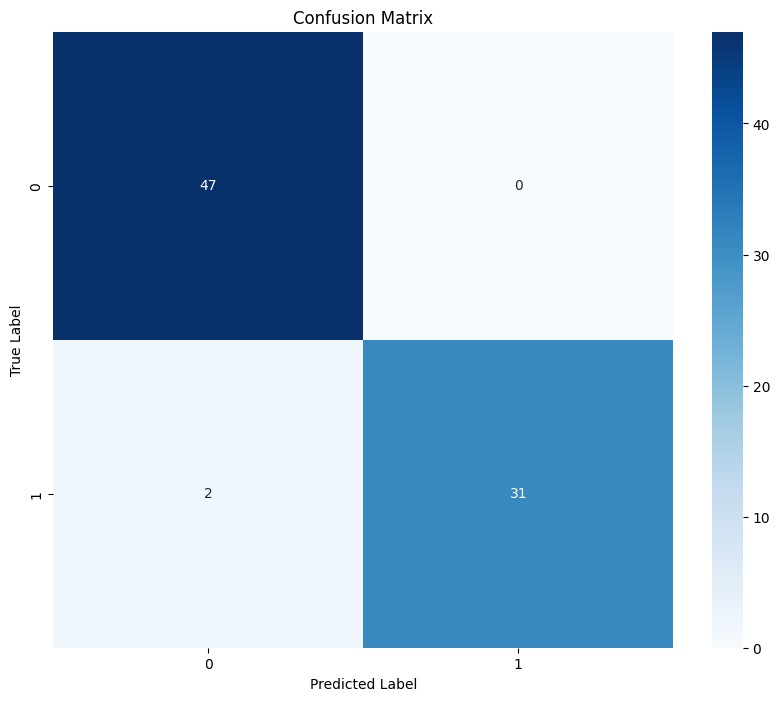

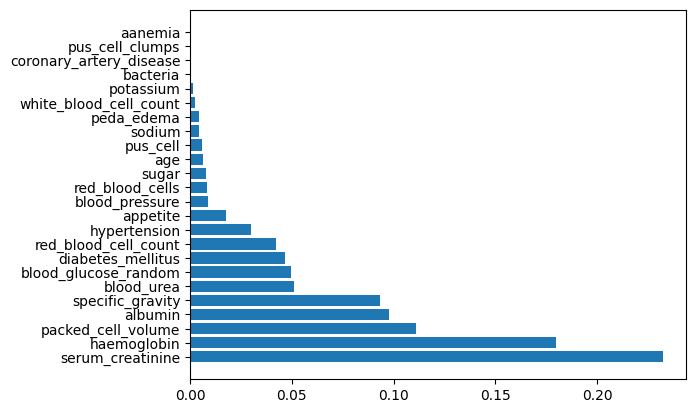

In [40]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'bootstrap': [True, False],
            'max_depth': [None, 5, 10, 15, 20],
            'max_features': [None, 'sqrt'],
            'min_samples_leaf': [1, 10, 20],
            'min_samples_split': [2, 10, 20],
            'n_estimators': [50, 100]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
rd_clf_acc, rd_clf_ra = print_score(model, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)
rfi=pd.Series(model.feature_importances_, index=df.columns.tolist()[:-1]).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

### **Models Results and Comparison**

In [41]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy Score' : [lr_acc, knn_acc, dtc_acc, rd_clf_acc],
    'ROC/AUC Score' : [lr_ra, knn_ra, dtc_ra, rd_clf_ra]})

models.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score,ROC/AUC Score
3,Random Forest Classifier,97.50,99.613153
2,Decision Tree Classifier,96.25,96.357189
0,Logistic Regression,91.25,98.388137
1,KNN,88.75,90.425532


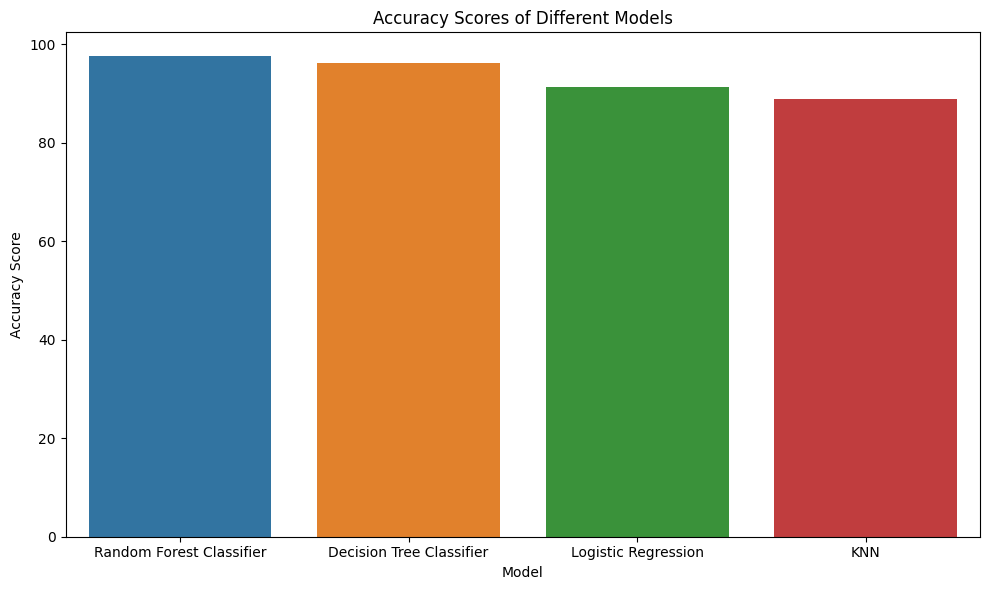

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=models.sort_values(by = 'Accuracy Score', ascending = False), x='Model', y='Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()